## Churn Prediction and Customer Segmentation with XGBoost for Targeted Retention

### Business Problem

Customer churn is a critical challenge for businesses, as retaining existing customers is often more cost-effective than acquiring new ones. In this scenario, the business needs to identify customers who are at high risk of leaving to proactively engage and retain them. Without this insight, the business risks losing valuable customers, leading to decreased revenue and higher customer acquisition costs. The current challenge is to effectively predict which customers are most likely to churn, based on various customer attributes and behaviors.

### Solution
To address the churn prediction problem, I initially built a Random Forest model using customer data. Despite achieving a relatively good accuracy of 83%, the AUC was lower at 0.59, indicating that the model's ability to distinguish between churn and non-churn customers was suboptimal. Given these results, I decided to explore other machine learning techniques to improve model performance.

Next, I implemented an XGBoost classifier, a gradient boosting algorithm known for its effectiveness in handling imbalanced datasets and providing higher predictive accuracy. After applying SMOTE for data balancing and performing hyperparameter tuning, I achieved a significant improvement in the model's performance. The final XGBoost model achieved an accuracy of 83.85% and an AUC of 0.835, which demonstrated much better predictive power, especially in distinguishing between high-risk and low-risk customers.

To further refine the model’s predictions, I applied a customized probability threshold of 0.3 to classify customers into three risk segments:

  -  High Risk: Customers with a high likelihood of churning.
  -  Moderate Risk: Customers with a moderate risk of churning.
  -  Low Risk: Customers unlikely to churn.

This segmentation enabled targeted retention strategies, allowing the business to focus resources effectively on customers at risk of leaving.

### Business Impact
By implementing this churn prediction model, the business gains the ability to:

  -  Proactively Retain High-Risk Customers: High-risk customers can be identified early, allowing the business to tailor retention efforts such as personalized offers, loyalty programs, or direct outreach. This reduces the likelihood of losing valuable customers.

  -  Optimize Marketing and Customer Support: With segmented customer data, marketing campaigns can be tailored specifically to each group, ensuring that resources are focused on the customers who need the most attention. For example, low-risk customers can receive minimal engagement, while high-risk customers get high-priority interventions.

  -  Increase Customer Lifetime Value (CLV): By reducing churn, the business can increase the lifetime value of its customers, leading to higher revenues over time.

  -   Cost Efficiency: Focusing retention efforts on high-risk customers helps optimize marketing spend. Instead of broadly targeting all customers, the business can direct resources more effectively, reducing unnecessary costs.

### Data Source: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

 - CreditScore: Numerical variable indicating creditworthiness.
 - Geography: Categorical variable indicating the customer’s location.
 - Gender: Categorical variable (Male/Female).
 - Age: Numerical variable.
 - Tenure: Numerical, representing years of association with the bank.
 - Balance: Numerical, showing account balance.
 - NumOfProducts: Numerical, number of products/services used.
 - HasCrCard, IsActiveMember: Binary features (1 or 0).
 - EstimatedSalary: Numerical variable.
 - Exited: Target variable (1 = churned, 0 = retained).
 - Complain, Satisfaction Score, Card Type, Point Earned: Potential predictors.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Customer-Churn-Records.csv')

Data Preprocessing

In [3]:
df.head


<bound method NDFrame.head of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

In [4]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
5610,5611,15783816,Lori,733,France,Female,28,5,0.00,2,0,0,12761.16,0,0,5,SILVER,777
3303,3304,15784320,Lenhardt,632,France,Female,44,3,133793.89,1,1,1,34607.14,1,1,1,SILVER,621
250,251,15628112,Hughes,771,Germany,Female,36,5,77846.90,1,0,0,99805.99,0,0,5,PLATINUM,895
6739,6740,15769191,Lipton,509,France,Male,55,8,132387.91,2,1,1,170360.11,0,0,1,PLATINUM,913
3723,3724,15710978,Palerma,715,Germany,Male,42,2,88120.97,2,1,1,21333.22,0,0,1,DIAMOND,577


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
df.shape

(10000, 18)

In [8]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [10]:
df.duplicated().sum()

0

In [11]:
df.drop_duplicates(inplace = True)
df.shape

(10000, 18)

In [12]:
# removes features that do not affect churn
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])


In [13]:
print(df.dtypes)

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object


Label Encode: Categorical to numeric

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
# binary variable 'Gender'male = 1, femaale = 0
df['Gender'] = le.fit_transform(df['Gender'])

In [17]:
print(df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')


In [18]:
# multi class variables 'Geography' and 'Card Type' I will use One-hot-encoder
df = pd.get_dummies(df, columns=['Geography', 'Card Type'], drop_first=True)

In [19]:
print(df.columns)

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_Germany',
       'Geography_Spain', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER'],
      dtype='object')


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Gender              10000 non-null  int32  
 2   Age                 10000 non-null  int64  
 3   Tenure              10000 non-null  int64  
 4   Balance             10000 non-null  float64
 5   NumOfProducts       10000 non-null  int64  
 6   HasCrCard           10000 non-null  int64  
 7   IsActiveMember      10000 non-null  int64  
 8   EstimatedSalary     10000 non-null  float64
 9   Exited              10000 non-null  int64  
 10  Complain            10000 non-null  int64  
 11  Satisfaction Score  10000 non-null  int64  
 12  Point Earned        10000 non-null  int64  
 13  Geography_Germany   10000 non-null  uint8  
 14  Geography_Spain     10000 non-null  uint8  
 15  Card Type_GOLD      10000 non-null  uint8  
 16  Card 

Handle numerical values: Scale

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['CreditScore',  'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary', 'Point Earned']
df[num_cols] = scaler.fit_transform(df[num_cols])

Exploratory Data Analysis (EDA)

Perform EDA to understand relationships between features and churn 'Exited'

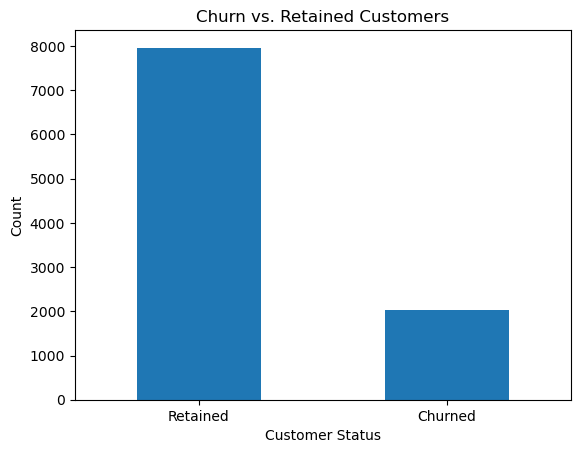

In [22]:
# Target Variable Distribution

df['Exited'].value_counts().plot(kind = 'bar')

# Add title and labels
plt.title('Churn vs. Retained Customers')  
plt.xlabel('Customer Status')  
plt.ylabel('Count') 
plt.xticks(ticks=[0, 1], labels=['Retained', 'Churned'], rotation=0)  

# Display the plot
plt.show()

<AxesSubplot:>

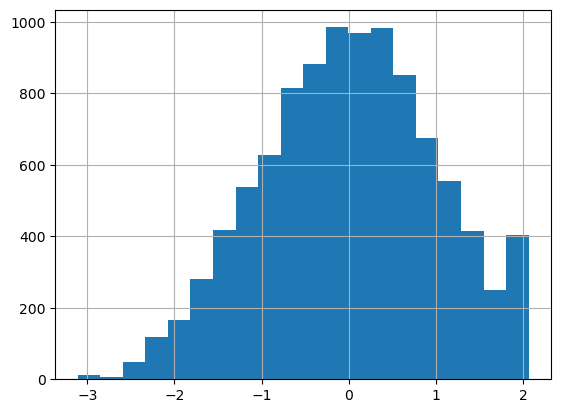

In [23]:
# Univariate Analysis --> plot histograms for each of the numerical features
df['CreditScore'].hist(bins = 20)

<AxesSubplot:>

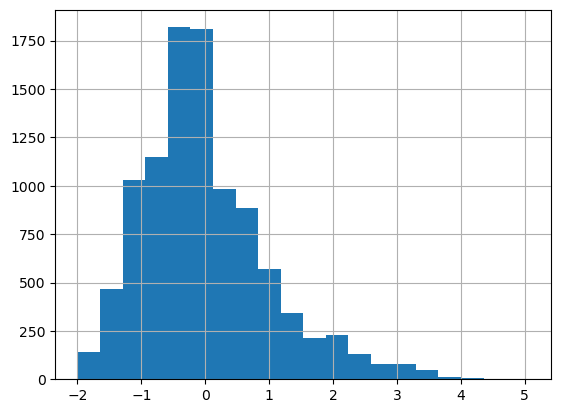

In [24]:
df['Age'].hist(bins = 20)

<AxesSubplot:>

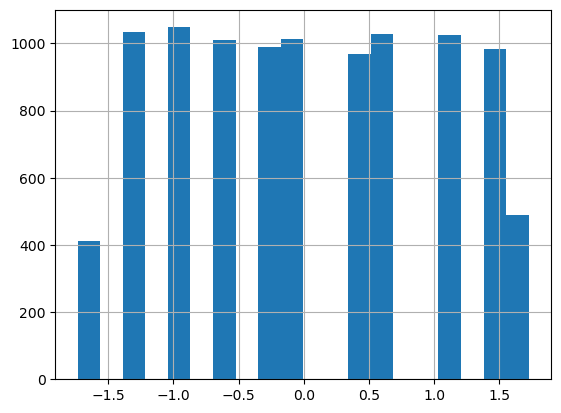

In [25]:
df['Tenure'].hist(bins = 20)

<AxesSubplot:>

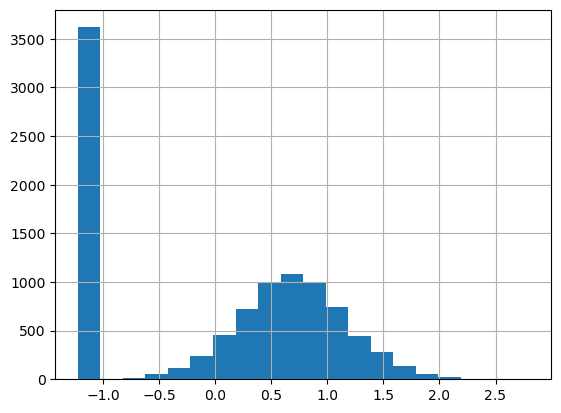

In [26]:
df['Balance'].hist(bins = 20)

<AxesSubplot:>

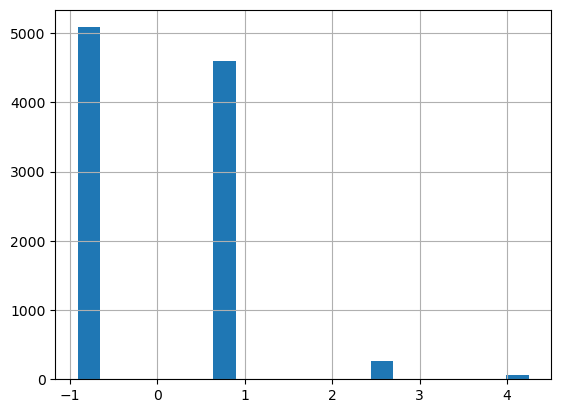

In [27]:
df['NumOfProducts'].hist(bins = 20)

<AxesSubplot:>

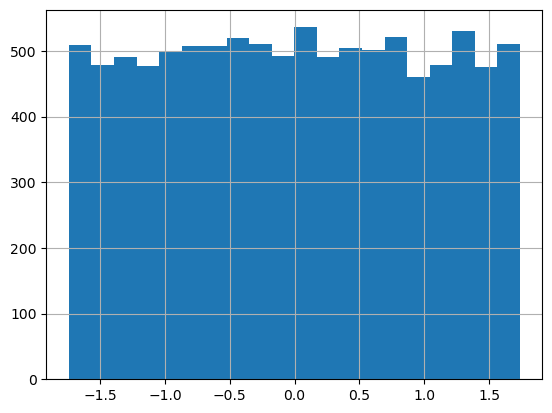

In [28]:
df['EstimatedSalary'].hist(bins = 20)

<AxesSubplot:>

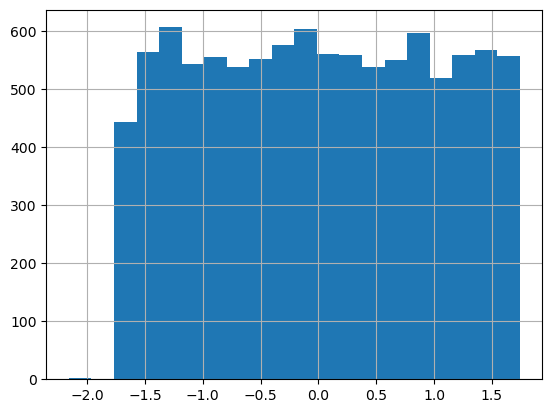

In [29]:
df['Point Earned'].hist(bins = 20)

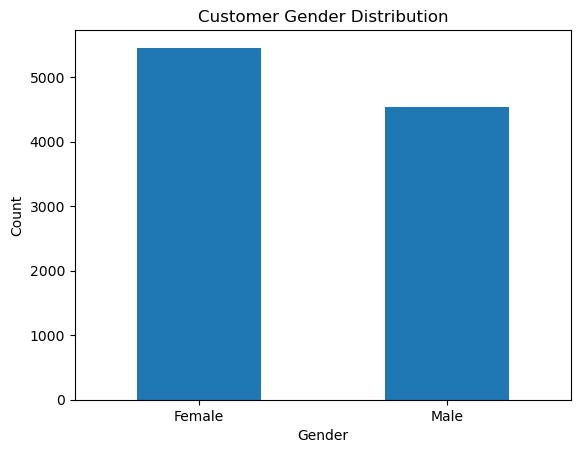

In [30]:
# Plot bar charts for categorical variables:
df['Gender'].value_counts().plot(kind='bar')
# Add title and labels
plt.title('Customer Gender Distribution')  
plt.xlabel('Gender')  
plt.ylabel('Count') 
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)  

# Display the plot
plt.show()

In [31]:
# Recreate the Geography column for plotting
df['Geography'] = df.apply(
    lambda row: 'France' if (row['Geography_Germany'] == 0 and row['Geography_Spain'] == 0)
    else ('Germany' if row['Geography_Germany'] == 1 else 'Spain'),
    axis=1
)


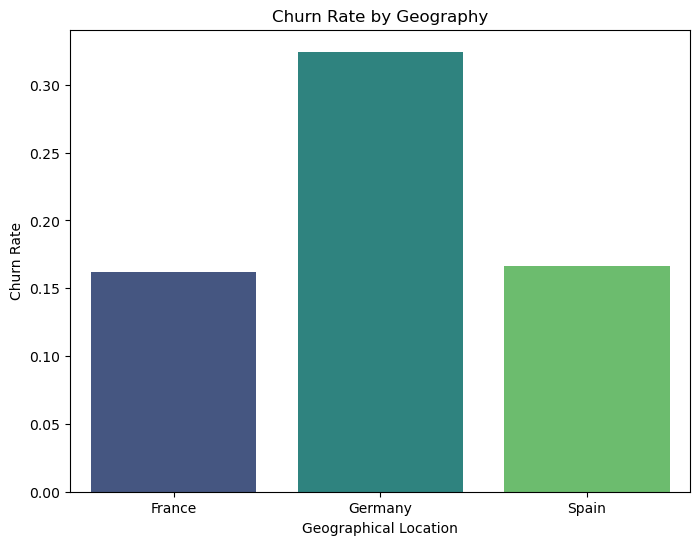

In [32]:
# Calculate churn counts for each geography
churn_counts = df.groupby('Geography')['Exited'].sum()
total_counts = df['Geography'].value_counts()

# Calculate churn rate
churn_rate = (churn_counts / total_counts).reset_index()
churn_rate.columns = ['Geography', 'Churn Rate']

# Plot churn rate by geography
plt.figure(figsize=(8, 6))
sns.barplot(data=churn_rate, x='Geography', y='Churn Rate', palette='viridis')
plt.title('Churn Rate by Geography')
plt.xlabel('Geographical Location')
plt.ylabel('Churn Rate')
plt.show()


In [33]:
# Recreate 'Geography_France' as the complementary column
df['Geography_France'] = 1 - (df['Geography_Germany'] + df['Geography_Spain'])

# Now calculate the sum of the geography indicators
print((df['Geography_France'] + df['Geography_Germany'] + df['Geography_Spain']).value_counts())


1    10000
dtype: int64


In [34]:
churn_by_geo = df.groupby('Geography')['Exited'].mean()
print(churn_by_geo)


Geography
France     0.161747
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


In [35]:
print(df['Geography'].value_counts())


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


In [36]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_Germany',
       'Geography_Spain', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER', 'Geography', 'Geography_France'],
      dtype='object')

C:\Users\zzyzz\AppData\Local\Temp\ipykernel_15048\562575834.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  churn_by_crdtype = churn_by_crdtype.append({'Card Type': card_type_name, 'Churn Rate': churn_rate}, ignore_index=True)
C:\Users\zzyzz\AppData\Local\Temp\ipykernel_15048\562575834.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  churn_by_crdtype = churn_by_crdtype.append({'Card Type': card_type_name, 'Churn Rate': churn_rate}, ignore_index=True)
C:\Users\zzyzz\AppData\Local\Temp\ipykernel_15048\562575834.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  churn_by_crdtype = churn_by_crdtype.append({'Card Type': card_type_name, 'Churn Rate': churn_rate}, ignore_index=True)


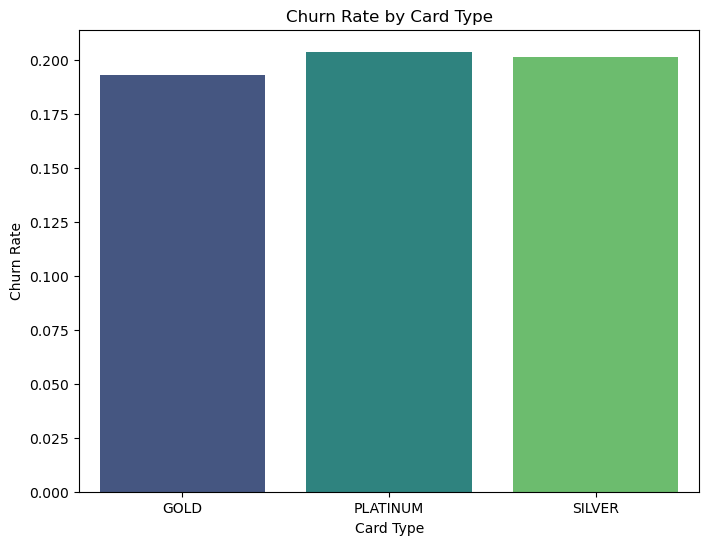

In [37]:
# Define the card type columns
card_type_columns = ['Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER']

# Create a DataFrame to store results
churn_by_crdtype = pd.DataFrame()

# Calculate churn rate for each card type
for card_type in card_type_columns:
    card_type_name = card_type.split('_')[-1]  # Extract the card type name (e.g., GOLD, PLATINUM, SILVER)
    churn_rate = df[df[card_type] == 1]['Exited'].mean()  # Calculate churn rate where this card type is 1
    churn_by_crdtype = churn_by_crdtype.append({'Card Type': card_type_name, 'Churn Rate': churn_rate}, ignore_index=True)

# Plot churn rate by card type
plt.figure(figsize=(8, 6))
sns.barplot(data=churn_by_crdtype, x='Card Type', y='Churn Rate', palette='viridis')
plt.title('Churn Rate by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Churn Rate')
plt.show()



In [38]:
# Create a 'CardType' column from the binary columns
df['CardType'] = df[['Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER']].idxmax(axis=1)

# Replace column names with card type names (e.g., 'Card Type_GOLD' -> 'GOLD')
df['CardType'] = df['CardType'].str.split('_').str[-1]

# Group by the new 'CardType' column and calculate the churn rate
churn_by_crdtype = df.groupby('CardType')['Exited'].mean()

print(churn_by_crdtype)



CardType
GOLD        0.205231
PLATINUM    0.203607
SILVER      0.201122
Name: Exited, dtype: float64


In [39]:
print(df['CardType'].value_counts())

GOLD        5009
SILVER      2496
PLATINUM    2495
Name: CardType, dtype: int64


### Box Plot: Represents the interquartile range (IQR), which contains the middle 50% of the data.
 - Represents whether a customer churned (1) or stayed (0).
 - Line in the Box: Represents the median balance for each group.

Result: Plot shows that churned customers tend to have higher balances, it could indicate dissatisfaction among high-value customers.

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

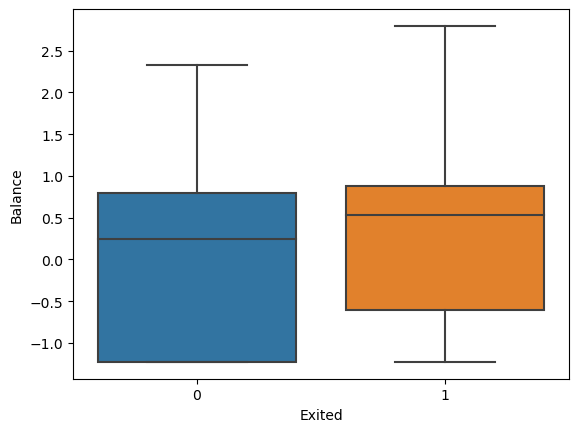

In [40]:
# [1 = churned ; 0 = retained]
sns.boxplot(x='Exited', y='Balance', data=df)


<AxesSubplot:xlabel='Exited', ylabel='Satisfaction Score'>

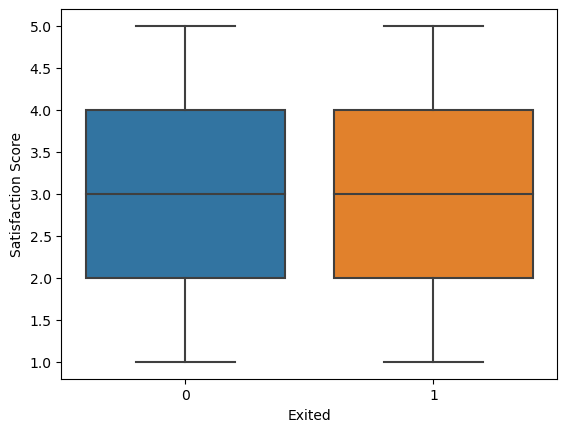

In [41]:
sns.boxplot(x='Exited', y='Satisfaction Score', data=df)

<AxesSubplot:xlabel='Exited', ylabel='Age'>

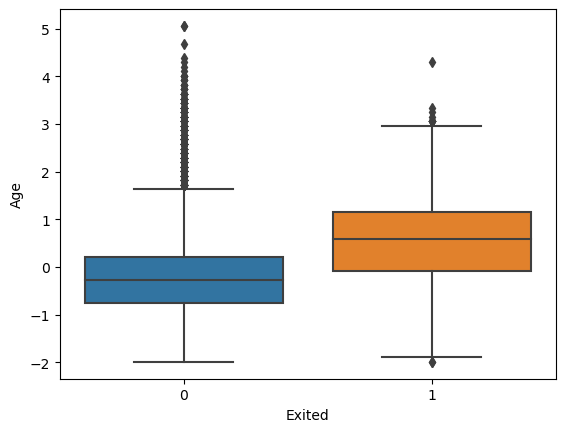

In [42]:
sns.boxplot(x='Exited', y='Age', data=df)

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

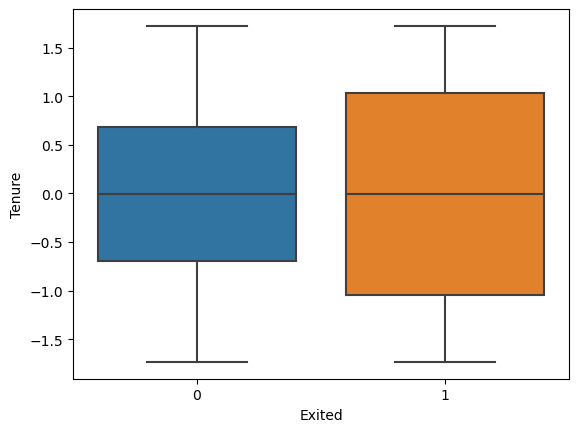

In [43]:
sns.boxplot(x='Exited', y='Tenure', data=df)

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

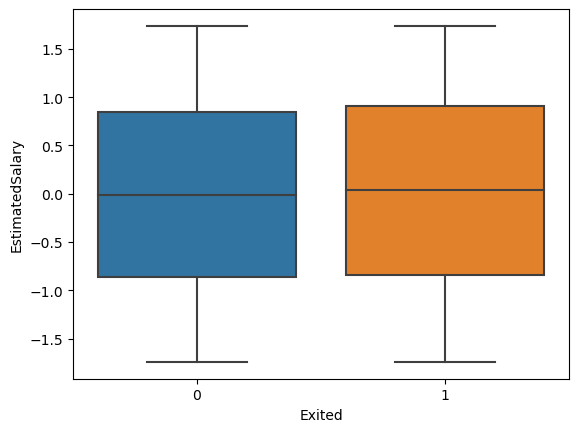

In [44]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)

<AxesSubplot:xlabel='Exited', ylabel='NumOfProducts'>

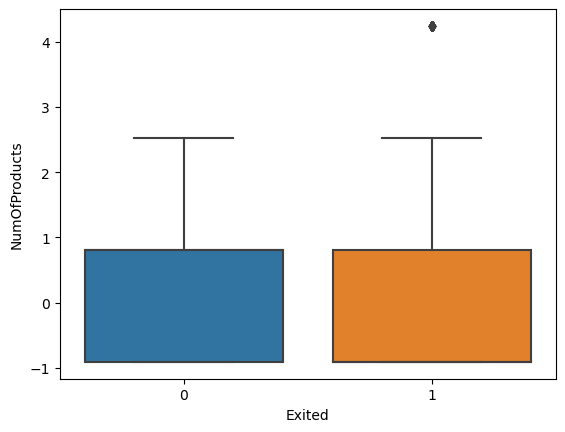

In [45]:
sns.boxplot(x='Exited', y='NumOfProducts', data=df)

### Churn rate across categories

In [46]:
# 0 -> non German cutomers that churned
# 1 -> German customers that churned
df.groupby('Geography_Germany')['Exited'].mean()

Geography_Germany
0    0.163396
1    0.324432
Name: Exited, dtype: float64

In [47]:
# 0 -> non Spain cutomers that churned
# 1 -> Spain customers that churned
df.groupby('Geography_Spain')['Exited'].mean()

Geography_Spain
0    0.216004
1    0.166734
Name: Exited, dtype: float64

In [48]:
# 0 -> non GOLD cutomers that churned
# 1 -> GOLD customers that churned
df.groupby('Card Type_GOLD')['Exited'].mean()

Card Type_GOLD
0    0.207522
1    0.192646
Name: Exited, dtype: float64

In [49]:
# 0 -> non SILVER cutomers that churned
# 1 -> SILVER customers that churned
df.groupby('Card Type_SILVER')['Exited'].mean()

Card Type_SILVER
0    0.204691
1    0.201122
Name: Exited, dtype: float64

In [50]:
# 0 -> non PLATINUM cutomers that churned
# 1 -> PLATINUM customers that churned
df.groupby('Card Type_PLATINUM')['Exited'].mean()

Card Type_PLATINUM
0    0.203864
1    0.203607
Name: Exited, dtype: float64

In [51]:
df.corr()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Geography_France
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077,0.005538,0.004780,0.010840,-0.013563,-0.000550,-0.008928
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106267,-0.106287,0.000242,-0.013225,-0.024628,0.016889,0.034619,-0.013238,-0.010241,0.006772
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222,0.046897,-0.001685,0.000917,0.004740,-0.009492,-0.039208
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196,-0.000567,0.003868,0.012292,-0.018773,0.007195,-0.002848
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608,0.401110,-0.134892,0.001939,-0.007330,-0.019068,-0.231329
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330,-0.010419,0.009039,-0.008558,0.020721,0.006603,0.001230
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041,0.010577,-0.013480,-0.013251,0.001915,0.008147,0.002467
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983,-0.020486,0.016732,0.011189,0.004081,0.007541,0.003317
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515,0.010297,-0.006482,0.004628,0.001076,0.010052,-0.003332
Exited,-0.026771,-0.106267,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628,0.173313,-0.052800,-0.015995,-0.000276,-0.003834,-0.104688


### Correlation between features

<AxesSubplot:>

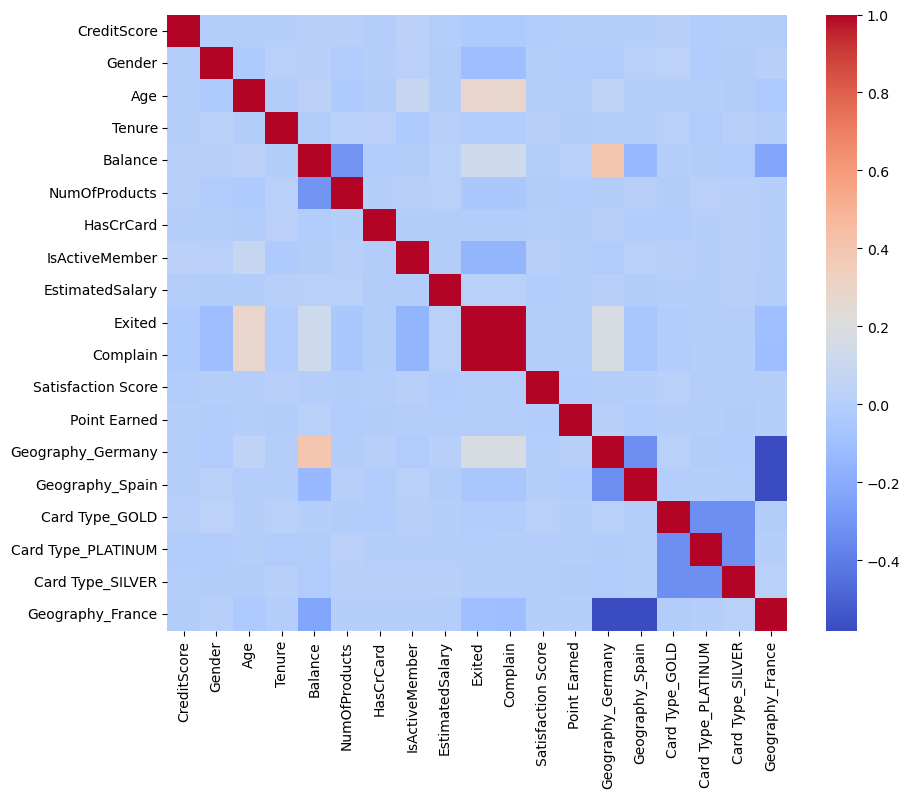

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

Feature refinement

In [53]:
#Create a feature for average points per product
#df['Points_Per_Product'] = df['Point Earned'] / (df['NumOfProducts'] + 1)

In [54]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_Germany',
       'Geography_Spain', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER', 'Geography', 'Geography_France', 'CardType'],
      dtype='object')

In [55]:

# drop these columns, as they have been encoded by one-hot-encoder into their own features and
# 'HasCrCard', 'IsActiveMember' do to leakage
df = df.drop(columns=['Geography','CardType','HasCrCard', 'IsActiveMember'])

### modeling
- Random Forest Classifier - Ensemble method

In [56]:
# split data into training and test sets

from sklearn.model_selection import train_test_split
X = df.drop('Exited', axis = 1)
y = df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = .20, random_state =42)

In [57]:
# train random forest model

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
X_test.columns


Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned',
       'Geography_Germany', 'Geography_Spain', 'Card Type_GOLD',
       'Card Type_PLATINUM', 'Card Type_SILVER', 'Geography_France'],
      dtype='object')

In [59]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Geography_France
9254,0.367013,1,-0.660018,0.341352,-1.225848,0.807737,1.373784,0,2,-0.427221,0,0,0,0,0,1
1561,-0.191713,1,0.293517,-0.350204,0.691389,0.807737,1.667407,0,4,1.560265,1,0,0,1,0,0
1670,-0.947028,1,-1.422847,-0.695982,0.613102,-0.911583,-0.246910,1,4,-1.237266,0,1,0,0,1,0
6087,-0.926334,0,-1.136786,1.378686,0.948021,-0.911583,0.921446,1,2,-0.174912,0,0,0,0,1,1
6669,-1.381593,1,1.628468,1.378686,1.052363,-0.911583,-1.053812,1,3,0.533323,0,0,0,1,0,1


In [60]:
y_train.head()

9254    0
1561    0
1670    1
6087    1
6669    1
Name: Exited, dtype: int64

In [61]:
y_test.head()

6252    0
4684    0
1731    0
4742    0
4521    0
Name: Exited, dtype: int64

In [62]:
#evaluate model performance using accuracy score

from sklearn.metrics import accuracy_score, classification_report

y_pred = rf_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



The performance metrics obtained for this model are exceptionally high.Given the accuracy is .999, precision, recall, and f1-score all being 1.00, the model is performing perfectly on both classes (churned and non-churned). However, such perfect results could be an indication of overfitting.



Check the Distribution of Classes (Churned vs. Non-Churned)

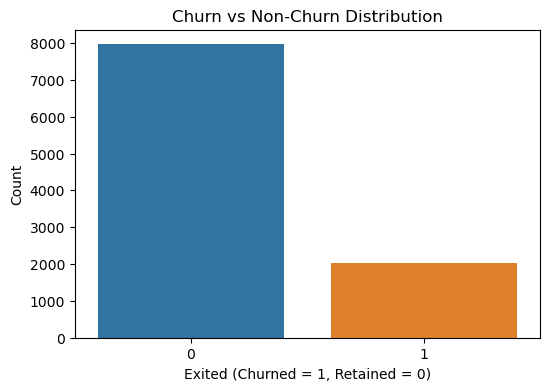

In [63]:
# Visualize the distribution of the target variable (Exited)
# Plot the distribution of the target variable ('Exited')

plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df)
plt.title('Churn vs Non-Churn Distribution')
plt.xlabel('Exited (Churned = 1, Retained = 0)')
plt.ylabel('Count')
plt.show()

In [64]:
# Check the percentage of each class:
churn_distribution = df['Exited'].value_counts(normalize=True) * 100
print(churn_distribution)


0    79.62
1    20.38
Name: Exited, dtype: float64


This indicates an imbalanced dataset, where there are significantly more non-churned customers than churned customers. This can lead to the model predicting the majority class (non-churned) more often, resulting in high accuracy but poor performance in predicting the minority class (churned).
- Course of action to resovle data imbalance: Resampling the data
- Course of action to resolve possible over fitting: remove features that might be causing leakage

In [65]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


               Feature  Importance
7             Complain    0.846244
2                  Age    0.052761
5        NumOfProducts    0.045799
4              Balance    0.010477
10   Geography_Germany    0.009539
6      EstimatedSalary    0.007488
9         Point Earned    0.007247
0          CreditScore    0.007150
3               Tenure    0.003173
1               Gender    0.002979
8   Satisfaction Score    0.002165
15    Geography_France    0.001788
11     Geography_Spain    0.000929
12      Card Type_GOLD    0.000803
14    Card Type_SILVER    0.000785
13  Card Type_PLATINUM    0.000674


In [66]:
### HANDLE LEAKAGE
# List of features to drop do to possible leakage
features_to_drop = ['Complain', 'Satisfaction Score', 'Point Earned']

# Drop features from the training and test sets
X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)


Balance data

In [67]:
# pip install imbalanced-learn

In [68]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

A note about SMOTE(Synthetic Minority Over-sampling Technique): 

    SMOTE is a technique used to address class imbalance by creating synthetic examples of the minority class.It works by selecting examples that are in the minority class, and for each such example, it creates synthetic examples by interpolating between the example and its nearest neighbors in the feature space.

In [69]:
### HANDLE DATA IMBALANCE
# Apply SMOTE only on the training data to avoid leakage.The test set should remain 
# untouched to simulate real-world scenarios where the model encounters unseen data.

smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Checking the distribution of the resampled training set
print(f"Resampled Training Set Distribution:\n{y_train_resampled.value_counts()}")


Resampled Training Set Distribution:
0    6355
1    6355
Name: Exited, dtype: int64


### Data is now balanced and possible leakage handled, now model training can begin.

In [70]:
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier()

In [71]:
y_pred = rf_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.826
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1607
           1       0.56      0.57      0.56       393

    accuracy                           0.83      2000
   macro avg       0.72      0.73      0.73      2000
weighted avg       0.83      0.83      0.83      2000



In [72]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=5)


array([0.84107002, 0.88630999, 0.92368214, 0.90283242, 0.91817467])

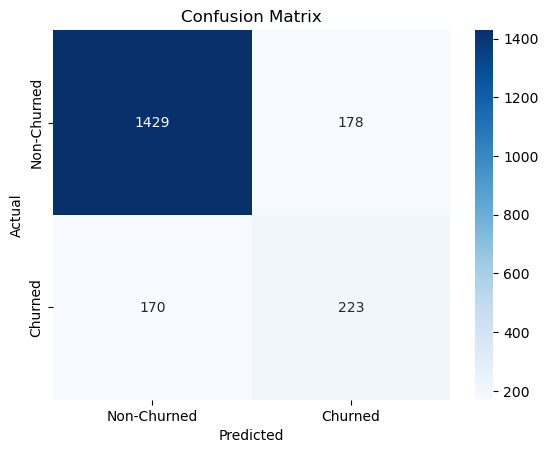

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churned', 'Churned'], yticklabels=['Non-Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


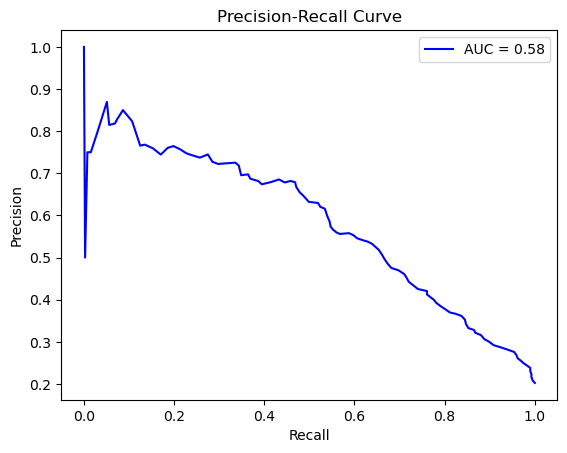

In [74]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_prob = rf_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, color='blue', label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# An AUC Score of 1.00 is perfect 
# An AUC of 0.58 suggests the model
# is only slightly better than random guessing. It indicates poor discriminatory power.


The Area Under(AUC) the Receiver Operating Characteristic Curve (AUC-ROC) measures the model's ability to distinguish between classes (churn vs. no churn). An AUC of 0.5 indicates random guessing, while an AUC of 1.0 represents perfect discrimination.
 - In this case, the AUC is 0.58 which suggests the model is only slightly better than random guessing. It indicates poor discriminatory power.

### New Modeling Approach - XGBoost
 

In [75]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [76]:
import xgboost as xgb

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

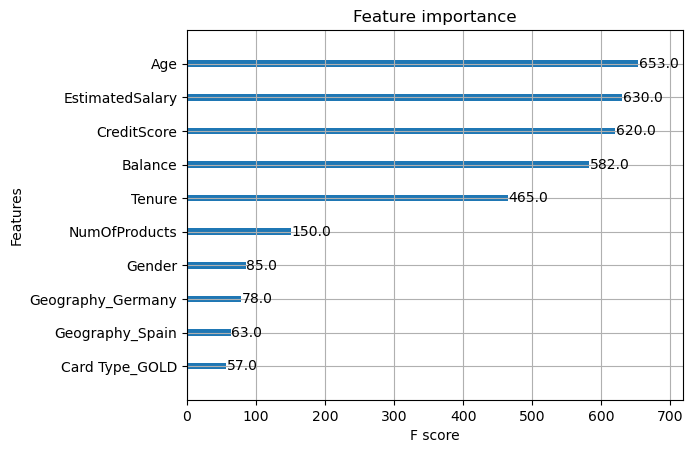

In [82]:
# Plot feature importance
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)


In [77]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='mlogloss', 
    scale_pos_weight=len(y_train_resampled) / sum(y_train_resampled == 0)  # Adjust for imbalance
)


# Train the model on the resampled training set
xgb_model.fit(X_train_resampled, y_train_resampled)


C:\Users\zzyzz\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [14:24:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [78]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)


In [79]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))


Accuracy: 0.812
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1607
           1       0.52      0.62      0.56       393

    accuracy                           0.81      2000
   macro avg       0.71      0.74      0.72      2000
weighted avg       0.83      0.81      0.82      2000



In [84]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV


# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10, 15],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'scale_pos_weight': [1, len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='auc'),
                           param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Evaluate the best model
print(f"Accuracy with best model: {accuracy_score(y_test, y_pred_best)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_best)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_best)}")
print(f"Precision: {precision_score(y_test, y_pred_best)}")
print(f"Recall: {recall_score(y_test, y_pred_best)}")
print(f"F1-Score: {f1_score(y_test, y_pred_best)}")



Fitting 3 folds for each of 256 candidates, totalling 768 fits


C:\Users\zzyzz\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [14:46:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.7}
Accuracy with best model: 0.8385
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1607
           1       0.60      0.55      0.57       393

    accuracy                           0.84      2000
   macro avg       0.74      0.73      0.74      2000
weighted avg       0.83      0.84      0.84      2000

AUC-ROC: 0.8350663683534665
Precision: 0.5966850828729282
Recall: 0.549618320610687
F1-Score: 0.5721854304635762


### What’s Working Well

   - AUC-ROC: This suggests the model is effective at ranking churn vs. non-churn probabilities.
   - General Accuracy: The model is robust for the overall dataset.
   
### Areas for Improvement

   - Boost Recall for Class 1 (Churn):
      -  Identifying churners is a priority, so I'll aim to increase recall for class 1.
      -  Adjust the classification threshold to prioritize recall:

In [86]:
from sklearn.metrics import precision_recall_curve

# Predict probabilities
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Adjust threshold
thresholds = [0.3, 0.4, 0.5, 0.6]
for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
    print(f"Threshold: {threshold}")
    print(f"Precision: {precision_score(y_test, y_pred_adjusted)}")
    print(f"Recall: {recall_score(y_test, y_pred_adjusted)}")
    print(f"F1-Score: {f1_score(y_test, y_pred_adjusted)}")


Threshold: 0.3
Precision: 0.54375
Recall: 0.6641221374045801
F1-Score: 0.5979381443298968
Threshold: 0.4
Precision: 0.5748792270531401
Recall: 0.6055979643765903
F1-Score: 0.5898389095415117
Threshold: 0.5
Precision: 0.5966850828729282
Recall: 0.549618320610687
F1-Score: 0.5721854304635762
Threshold: 0.6
Precision: 0.6270096463022508
Recall: 0.4961832061068702
F1-Score: 0.5539772727272727


Business Context:

 -  If the cost of missing churners (false negatives) is high, choose a lower threshold (e.g., 0.3).
 -  If the cost of targeting non-churners unnecessarily (false positives) is high, use a higher threshold (e.g., 0.6).
### Goal is to predict churning customers, therefore, threshold 0.03 will be used

### Customer Segmentation
 ###  Segmentation	Probability Range	Description and	Suggested Actions
 - High Risk	≥ 0.7	Likely to churn soon.	Immediate, high-priority interventions.
 - Moderate Risk	0.3–0.7	May churn but less urgent.	Targeted campaigns, personalized offers.
 - Low Risk	< 0.3	Unlikely to churn.	Maintain satisfaction, light engagement.

In [90]:
# Predict probabilities
y_pred_proba =best_model.predict_proba(X_test)[:, 1]

# Add probabilities to the test data
X_test['churn_probability'] = y_pred_proba



In [92]:
def assign_segment(probability):
    if probability >= 0.7:
        return 'High Risk'
    elif probability >= 0.3:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

# Apply segmentation
X_test['churn_segment'] = X_test['churn_probability'].apply(assign_segment)


In [97]:
# Summarize the distribution of customers in each segment:

segment_summary = X_test['churn_segment'].value_counts(normalize=True)
print(segment_summary)


Low Risk         0.7600
High Risk        0.1325
Moderate Risk    0.1075
Name: churn_segment, dtype: float64


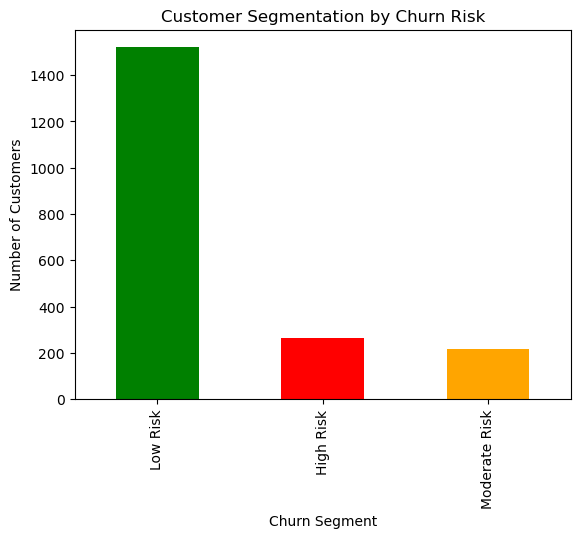

In [106]:
# Plot segment distribution
X_test['churn_segment'].value_counts().plot(kind='bar', color=['green', 'red', 'orange'])
plt.title('Customer Segmentation by Churn Risk')
plt.xlabel('Churn Segment')
plt.ylabel('Number of Customers')
plt.show()


In [104]:
# Select key features for analysis
segmentation_data = X_test[['churn_probability', 'churn_segment', 'Age', 'Balance']]

# Group by segment for insights
segment_insights = segmentation_data.groupby('churn_segment').mean()
print(segment_insights)


               churn_probability       Age   Balance
churn_segment                                       
High Risk               0.897634  0.806988  0.243981
Low Risk                0.047297 -0.195044 -0.053927
Moderate Risk           0.486182  0.469589  0.309382


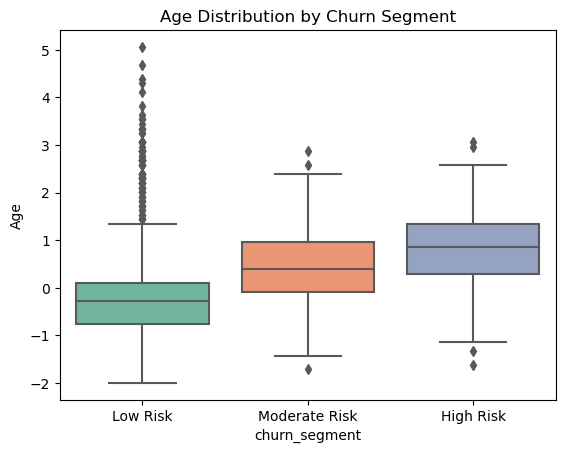

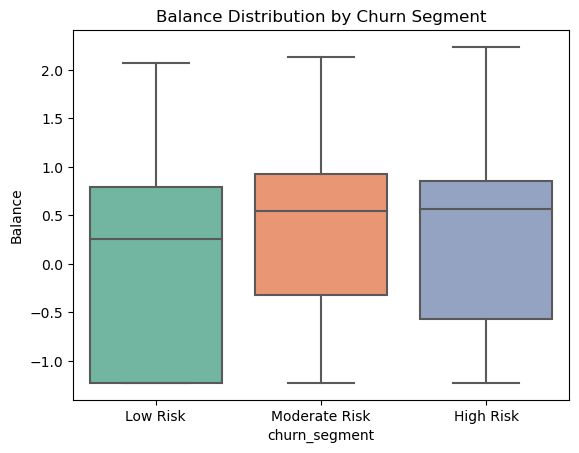

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Age distribution by churn segment
sns.boxplot(x='churn_segment', y='Age', data=X_test, palette='Set2')
plt.title('Age Distribution by Churn Segment')
plt.show()

# Visualize Balance distribution by churn segment
sns.boxplot(x='churn_segment', y='Balance', data=X_test, palette='Set2')
plt.title('Balance Distribution by Churn Segment')
plt.show()


### Summary
This predictive churn model provides the business with actionable insights into customer behavior, enabling targeted interventions that can reduce churn, enhance customer satisfaction, and improve profitability.

### Future approaches for refining and improving model performance:
- Feature engineering
- Use other machine learning models such as, logistic regression. CatBoost. LightGBM
- Hyperparameter optimization
- Different method for handling imbalanced data
- Exploring other data from other sources
